# Scipy.io wavfile

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

%matplotlib inline


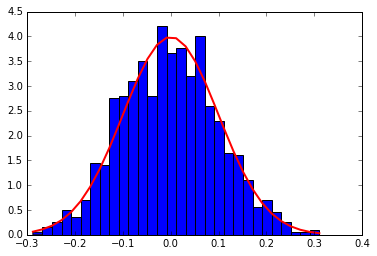

In [34]:
# generate normal distribution 

mu = 0 # expectatiion = mean
sigma = 0.1 # standard deviation

s =  np.random.normal(mu, sigma, 1000)


count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot( bins, 1/(sigma * np.sqrt(2 * np.pi)) * \
          np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

In [35]:
print bins # =  linspace(min, max, binsize) 

[-0.28812233 -0.26815701 -0.24819168 -0.22822636 -0.20826103 -0.18829571
 -0.16833039 -0.14836506 -0.12839974 -0.10843442 -0.08846909 -0.06850377
 -0.04853844 -0.02857312 -0.0086078   0.01135753  0.03132285  0.05128817
  0.0712535   0.09121882  0.11118415  0.13114947  0.15111479  0.17108012
  0.19104544  0.21101076  0.23097609  0.25094141  0.27090674  0.29087206
  0.31083738]


In [36]:
#check

np.sqrt(sum((s - s.mean())**2)/len(s)) #sigma

0.099851624857670351

In [6]:


rate, audio = wavfile.read('D_1000001.wav')

In [38]:
# compute parameters

muAudio = audio.mean()
sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))

print muAudio
print sigmaAudio

-33.0996302981
3657.13662845


In [39]:
binSize = int(audio.shape[0]**(1/3.0))


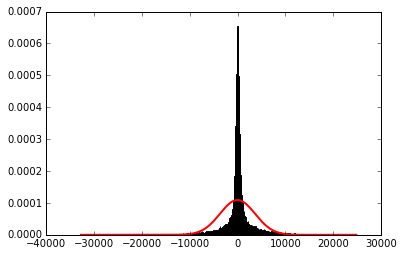

In [41]:
countA, binsA, ignoredA = plt.hist(audio, 1000, normed=True)
plt.plot( binsA, 1/(sigmaAudio * np.sqrt(2 * np.pi)) * np.exp( - (binsA - muAudio)**2 / (2 * sigmaAudio**2) ),linewidth=2, color='r')
plt.show()

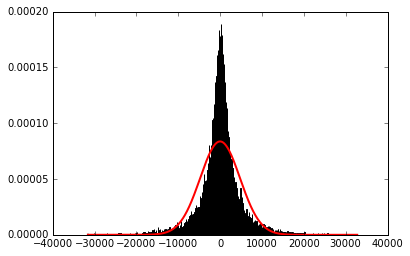

In [43]:
rateSpoof, audioSpoof = wavfile.read('D_1001709.wav')
muAudioSpoof = audioSpoof.mean()
sigmaAudioSpoof = np.sqrt(sum((audioSpoof - audioSpoof.mean())**2)/len(audioSpoof))

#binSize = int(audioSpoof.shape[0]**(1/3.0))
countA, binsA, ignoredA = plt.hist(audioSpoof, 1000, normed=True)
plt.plot( binsA, 1/(sigmaAudioSpoof * np.sqrt(2 * np.pi)) * np.exp( - (binsA - muAudioSpoof)**2 / (2 * sigmaAudioSpoof**2) ),linewidth=2, color='r')
plt.show()

In [12]:
print sigmaAudioSpoof
print sigmaAudio

4768.24530805
3657.13662845


# Librosa  

In [13]:
import librosa

audio, rate = librosa.load('D_1000001.wav')

-0.0010083
0.111605769675
45


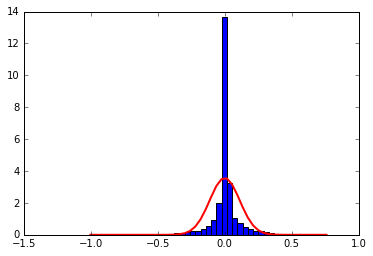

In [14]:
muAudio = audio.mean()
sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))

print muAudio
print sigmaAudio

binSize = int(audio.shape[0]**(1/3.0)) # propotrion to the root of the three degree = x**(1/3.0)

print binSize

countA, binsA, ignoredA = plt.hist(audio, binSize, normed=True)
plt.plot( binsA, 1/(sigmaAudio * np.sqrt(2 * np.pi)) * np.exp( - (binsA - muAudio)**2 / (2 * sigmaAudio**2) ),linewidth=2, color='r')
plt.show()

-0.000155488
0.143528517547
31


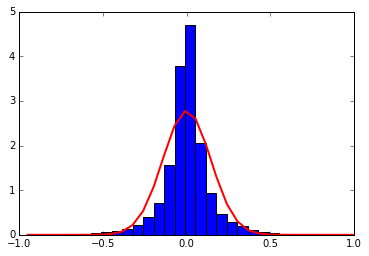

In [15]:
audio, rate = librosa.load('D_1001709.wav')

muAudio = audio.mean()
sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))

print muAudio
print sigmaAudio

binSize = int(audio.shape[0]**(1/3.0))
print binSize

countA, binsA, ignoredA = plt.hist(audio, binSize, normed=True)
plt.plot( binsA, 1/(sigmaAudio * np.sqrt(2 * np.pi)) * np.exp( - (binsA - muAudio)**2 / (2 * sigmaAudio**2) ),linewidth=2, color='r')
plt.show()

-0.000161023
0.0842903425144
35


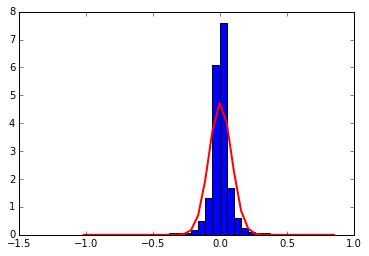

In [16]:
audio, rate = librosa.load('D_1001710.wav')

muAudio = audio.mean()
sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))

print muAudio
print sigmaAudio

binSize = int(audio.shape[0]**(1/3.0))
print binSize
countA, binsA, ignoredA = plt.hist(audio, binSize, normed=True)
plt.plot( binsA, 1/(sigmaAudio * np.sqrt(2 * np.pi)) * np.exp( - (binsA - muAudio)**2 / (2 * sigmaAudio**2) ),linewidth=2, color='r')
plt.show()

In [17]:
# Many signals

rate, o1 = wavfile.read('D_1000001.wav')
rate,o2 = wavfile.read('D_1000002.wav')
rate,o3 = wavfile.read('D_1000003.wav')

rate,s1 = wavfile.read('D_1001708.wav')
rate,s2 = wavfile.read('D_1001709.wav')
rate,s3 = wavfile.read('D_1001710.wav')

# original files

print np.sqrt(sum((o1 - o1.mean())**2)/len(o1))
print np.sqrt(sum((o2 - o2.mean())**2)/len(o2))
print np.sqrt(sum((o3 - o3.mean())**2)/len(o3))

print '-'*10
# spoofed

print np.sqrt(sum((s1 - o1.mean())**2)/len(o1))
print np.sqrt(sum((s2 - s2.mean())**2)/len(s2))
print np.sqrt(sum((s3 - s3.mean())**2)/len(s3))


3657.13662845
3402.97433635
3116.40485764
----------
2042.5503528
4768.24530805
2838.95096337


# works with data

In [160]:
import pandas as pd
dataframe = pd.read_csv('train_label.csv')

nSamplesOriginal =  dataframe[dataframe.Type=='genuine'].FileID.shape[0]
nSamplesSpoof =  dataframe[dataframe.Type=='spoof'].FileID.shape[0]

nameFilesOriginal = dataframe[dataframe.Type=='genuine'].FileID[:nSamplesOriginal]
nameFilesSpoof = dataframe[dataframe.Type=='spoof'].FileID[:nSamplesSpoof]



In [55]:
sigmaVectorOriginal = []
varOriginal = []
meanOriginal = []

for i in nameFilesOriginal:
    rate, audio = wavfile.read('./ASVspoof2017_train_dev/wav/train/' + i)
    sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))
    varOriginal.append(sigmaAudio**2)
    sigmaVectorOriginal.append(sigmaAudio)
    meanOriginal.append(np.mean(audio))
    
sigmaVectorSpoof = []
varSpoof = []
meanSpoof = [] 
for i in nameFilesSpoof:
    rate, audio = wavfile.read('./ASVspoof2017_train_dev/wav/train/' + i)
    sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))
    
    varSpoof.append(sigmaAudio**2)
    sigmaVectorSpoof.append(sigmaAudio)
    meanSpoof.append(np.mean(audio))


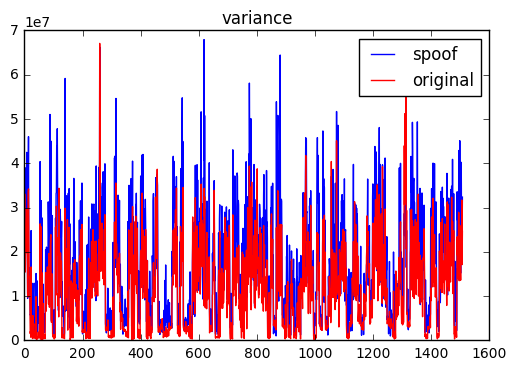

In [56]:
plt.plot(varSpoof, label="spoof")
plt.title('variance')
plt.plot(varOriginal, color = 'red', label="original")
plt.legend()
plt.show()

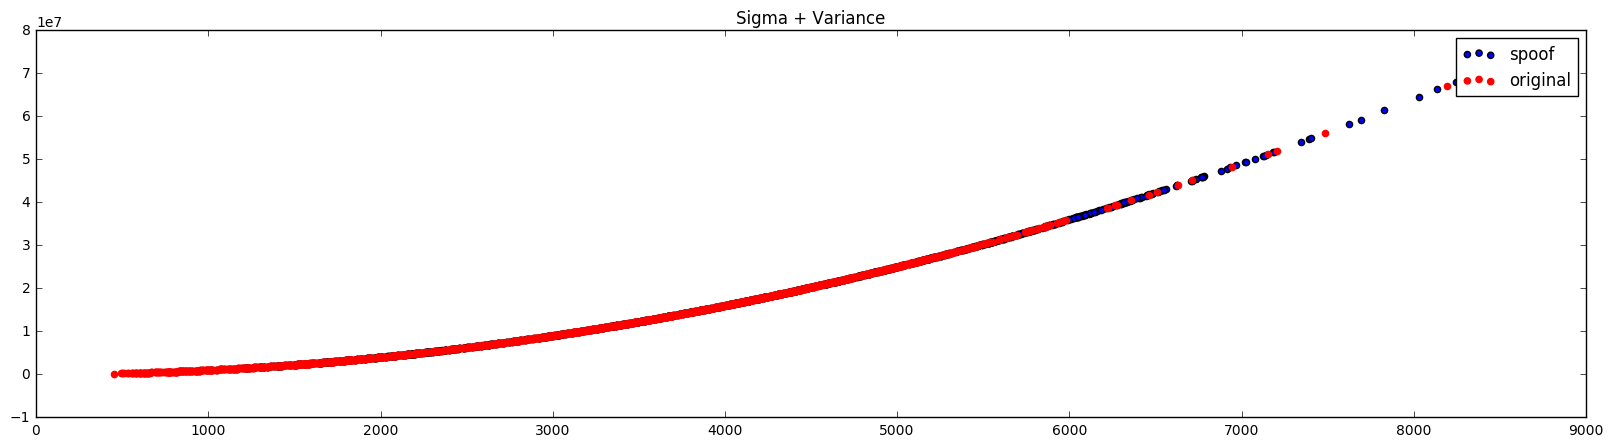

In [57]:
plt.figure(figsize=(20,5))
plt.title('Sigma + Variance')
plt.scatter(sigmaVectorSpoof, varSpoof, label="spoof")
plt.scatter(sigmaVectorOriginal,varOriginal, color = 'red', label="original")
plt.legend()
plt.show()

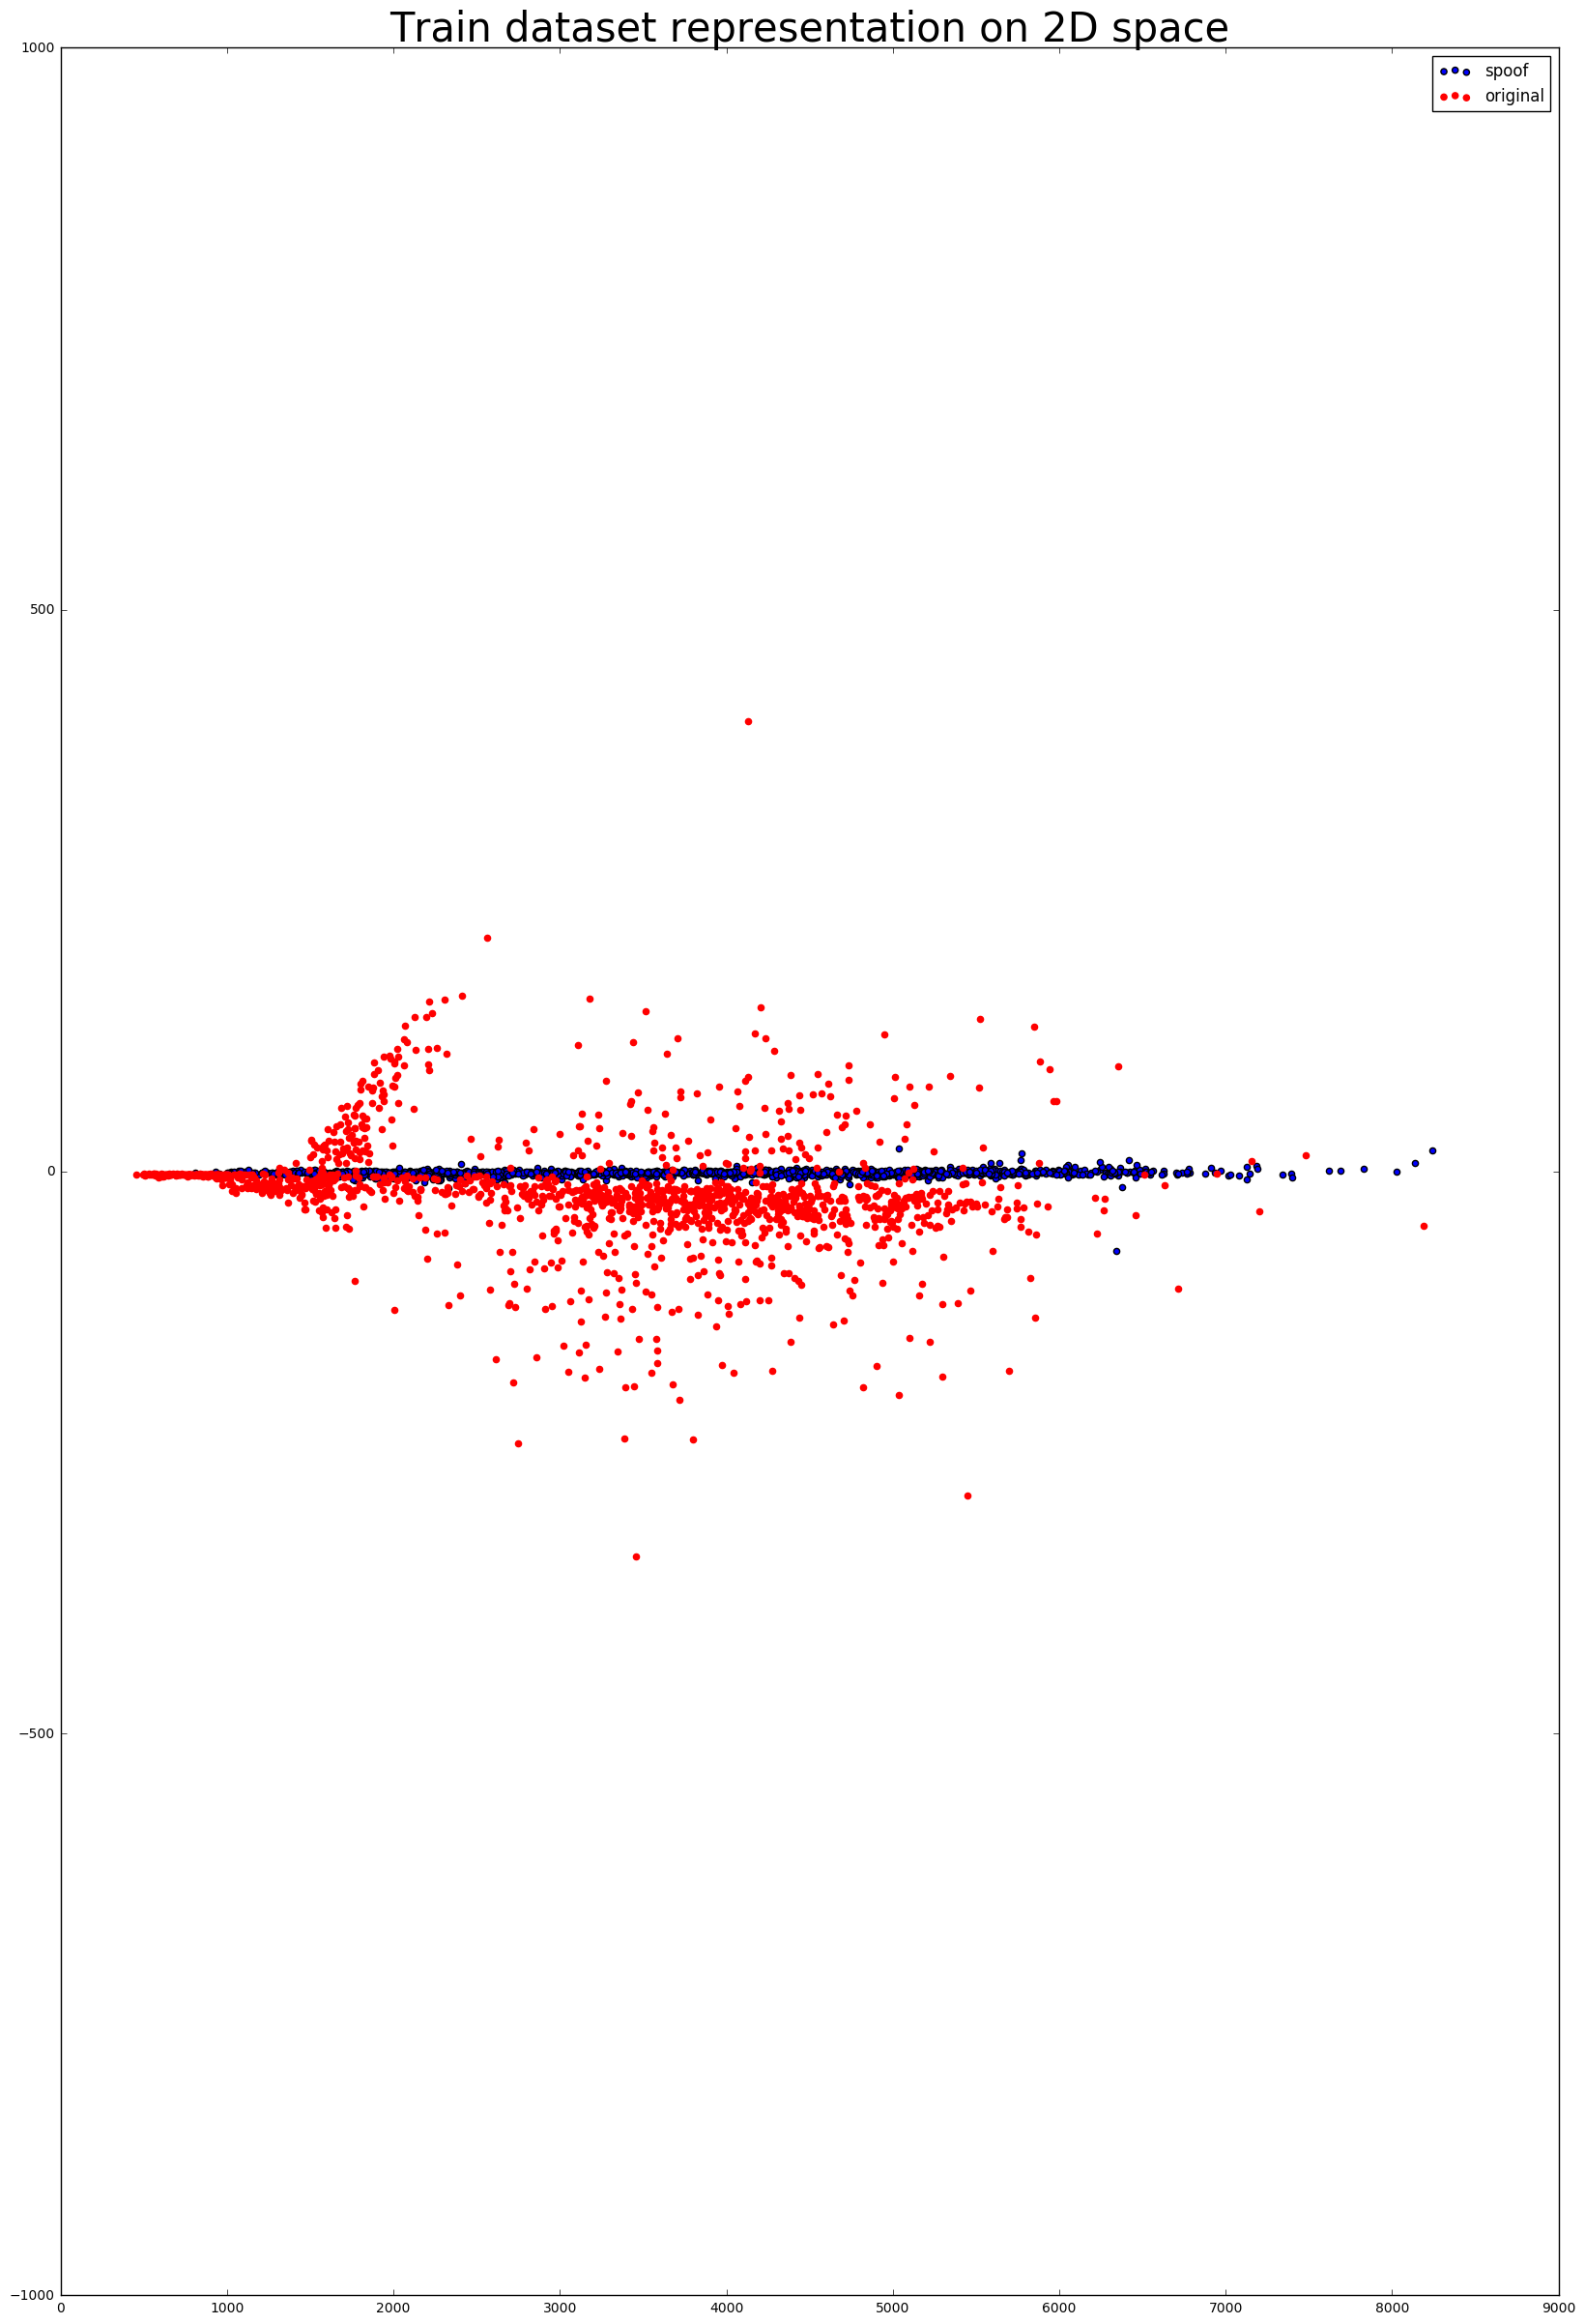

In [58]:
plt.figure(figsize=(20,30))
plt.title('Train dataset representation on 2D space', size = 30)
plt.scatter(sigmaVectorSpoof, meanSpoof,  label="spoof")
plt.ylim(-1000, 1000)
plt.scatter(sigmaVectorOriginal,meanOriginal, color = 'red', label="original")
plt.legend()
plt.show()

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

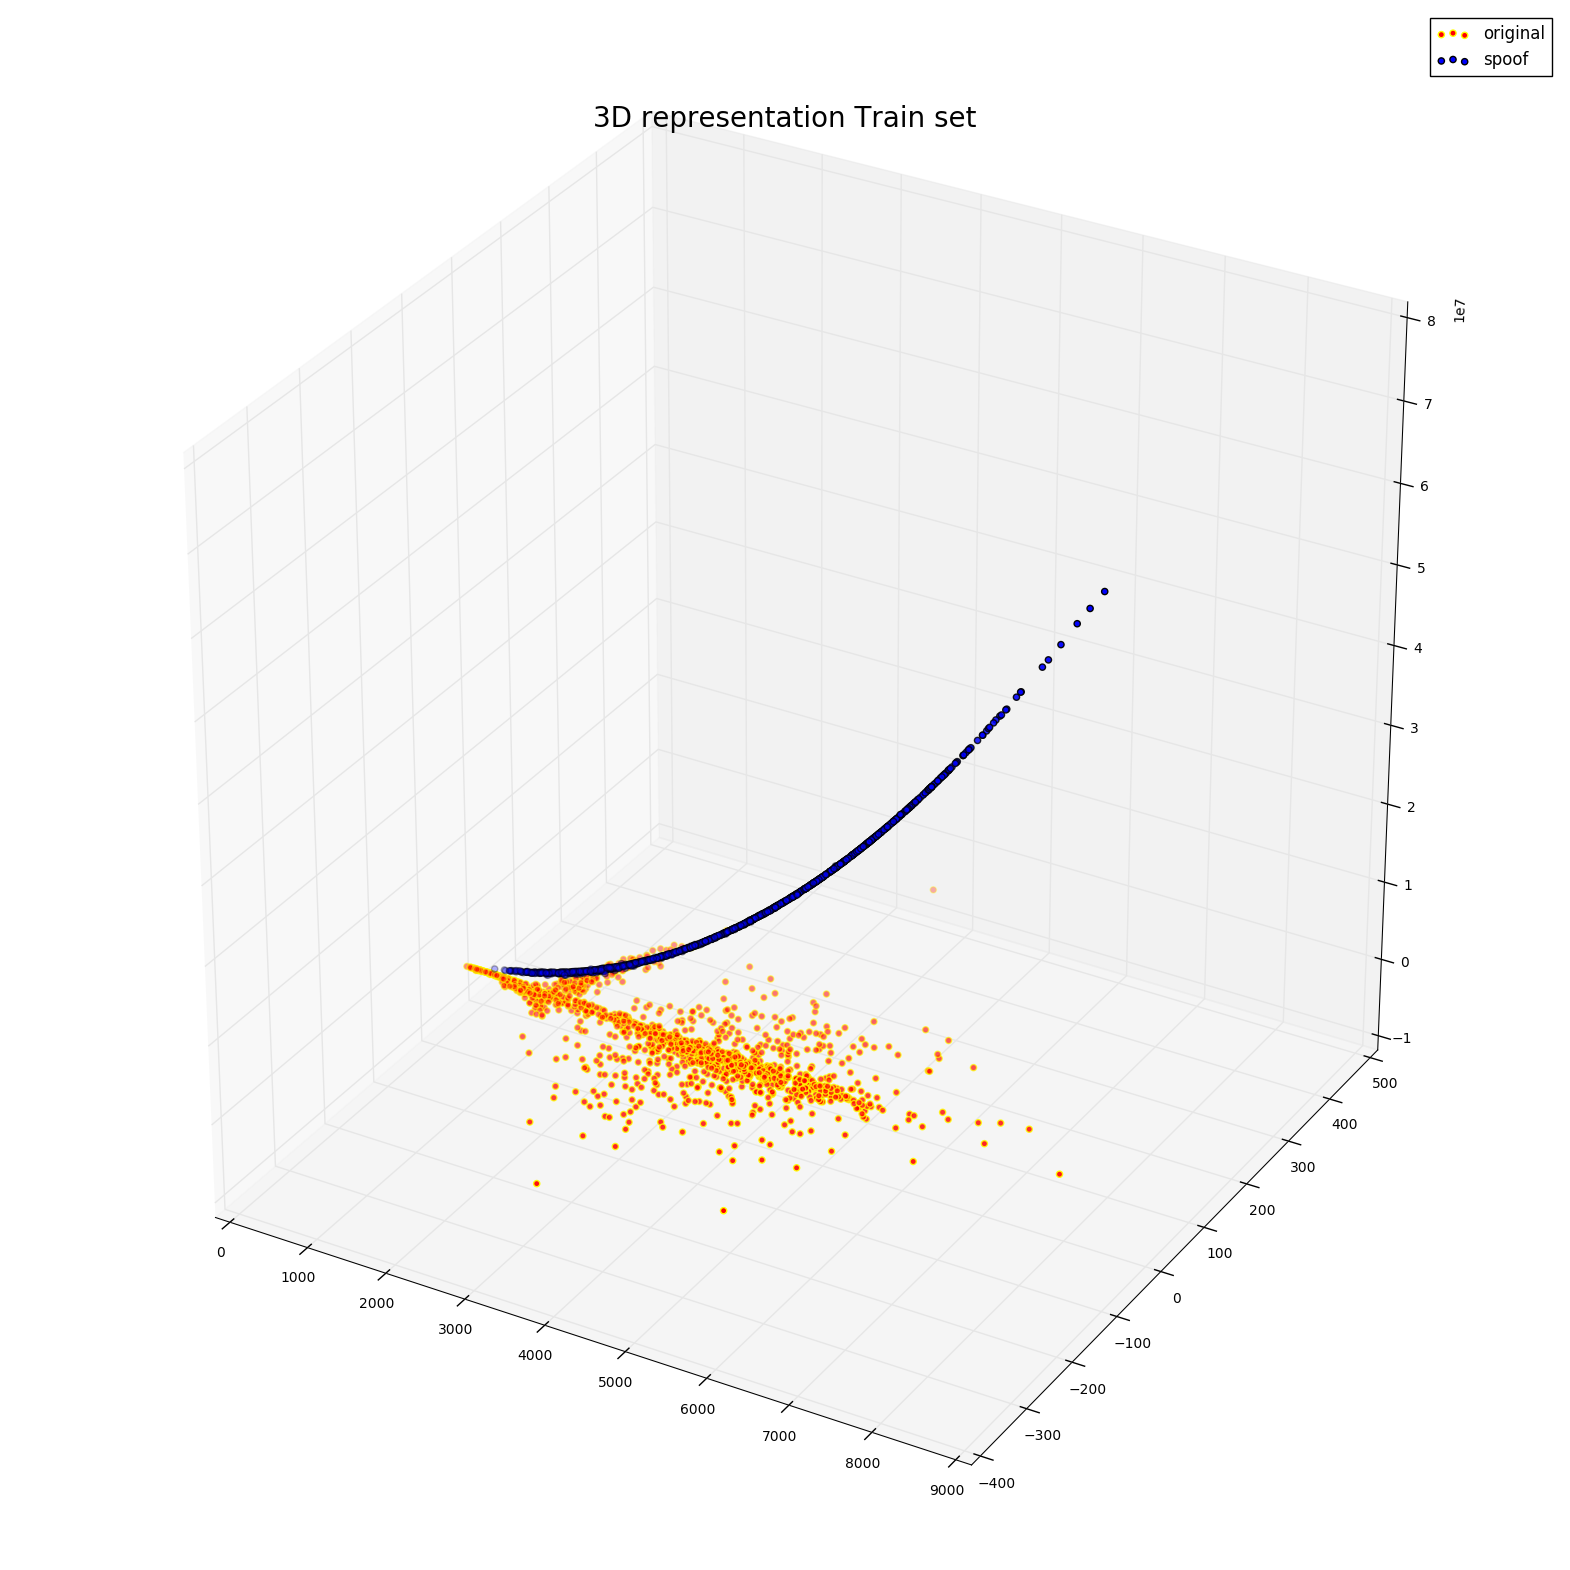

In [61]:
# here we plot 3D model: x = sigma, y = mean, z = variance

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
plt.title('3D representation Train set', size = 20)
ax.scatter(sigmaVectorOriginal,meanOriginal, color = 'red', edgecolor = 'yellow', label="original")
ax.scatter(sigmaVectorSpoof, meanSpoof,  varSpoof,  marker ='o', label="spoof")
plt.legend()
plt.show()

## Devepment

In [62]:
import pandas as pd
dataframe = pd.read_csv('dev_label.csv')

nSamplesOriginalD =  dataframe[dataframe.Type=='genuine'].FileID.shape[0]
nSamplesSpoofD =  dataframe[dataframe.Type=='spoof'].FileID.shape[0]

nameFilesOriginalD = dataframe[dataframe.Type=='genuine'].FileID[:nSamplesOriginal]
nameFilesSpoofD = dataframe[dataframe.Type=='spoof'].FileID[:nSamplesSpoof]



In [67]:
sigmaVectorOriginalD = []
varOriginalD = []
meanOriginalD = []

for i in nameFilesOriginalD:
    rate, audio = wavfile.read('./ASVspoof2017_train_dev/wav/dev/' + i)
    sigmaAudioD = np.sqrt(sum((audio - audio.mean())**2)/len(audio))
    varOriginalD.append(sigmaAudioD**2)
    sigmaVectorOriginalD.append(sigmaAudioD)
    meanOriginalD.append(np.mean(audio))
    
sigmaVectorSpoofD = []
varSpoofD = []
meanSpoofD = [] 
for i in nameFilesSpoofD:
    rate, audio = wavfile.read('./ASVspoof2017_train_dev/wav/dev/' + i)
    sigmaAudioD = np.sqrt(sum((audio - audio.mean())**2)/len(audio))
    
    varSpoofD.append(sigmaAudioD**2)
    sigmaVectorSpoofD.append(sigmaAudioD)
    meanSpoofD.append(np.mean(audio))


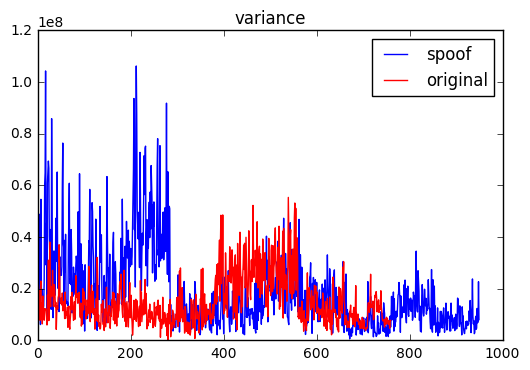

In [68]:
plt.plot(varSpoofD, label="spoof")
plt.title('variance')
plt.plot(varOriginalD, color = 'red', label="original")
plt.legend()
plt.show()

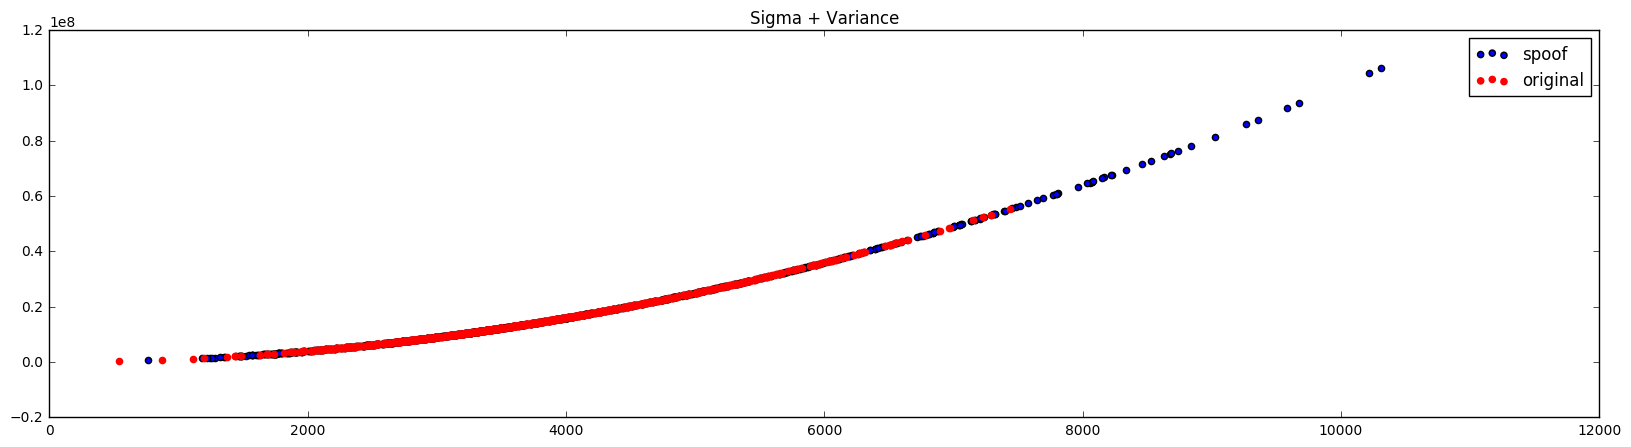

In [69]:
plt.figure(figsize=(20,5))
plt.title('Sigma + Variance')
plt.scatter(sigmaVectorSpoofD, varSpoofD, label="spoof")
plt.scatter(sigmaVectorOriginalD,varOriginalD, color = 'red', label="original")
plt.legend()
plt.show()

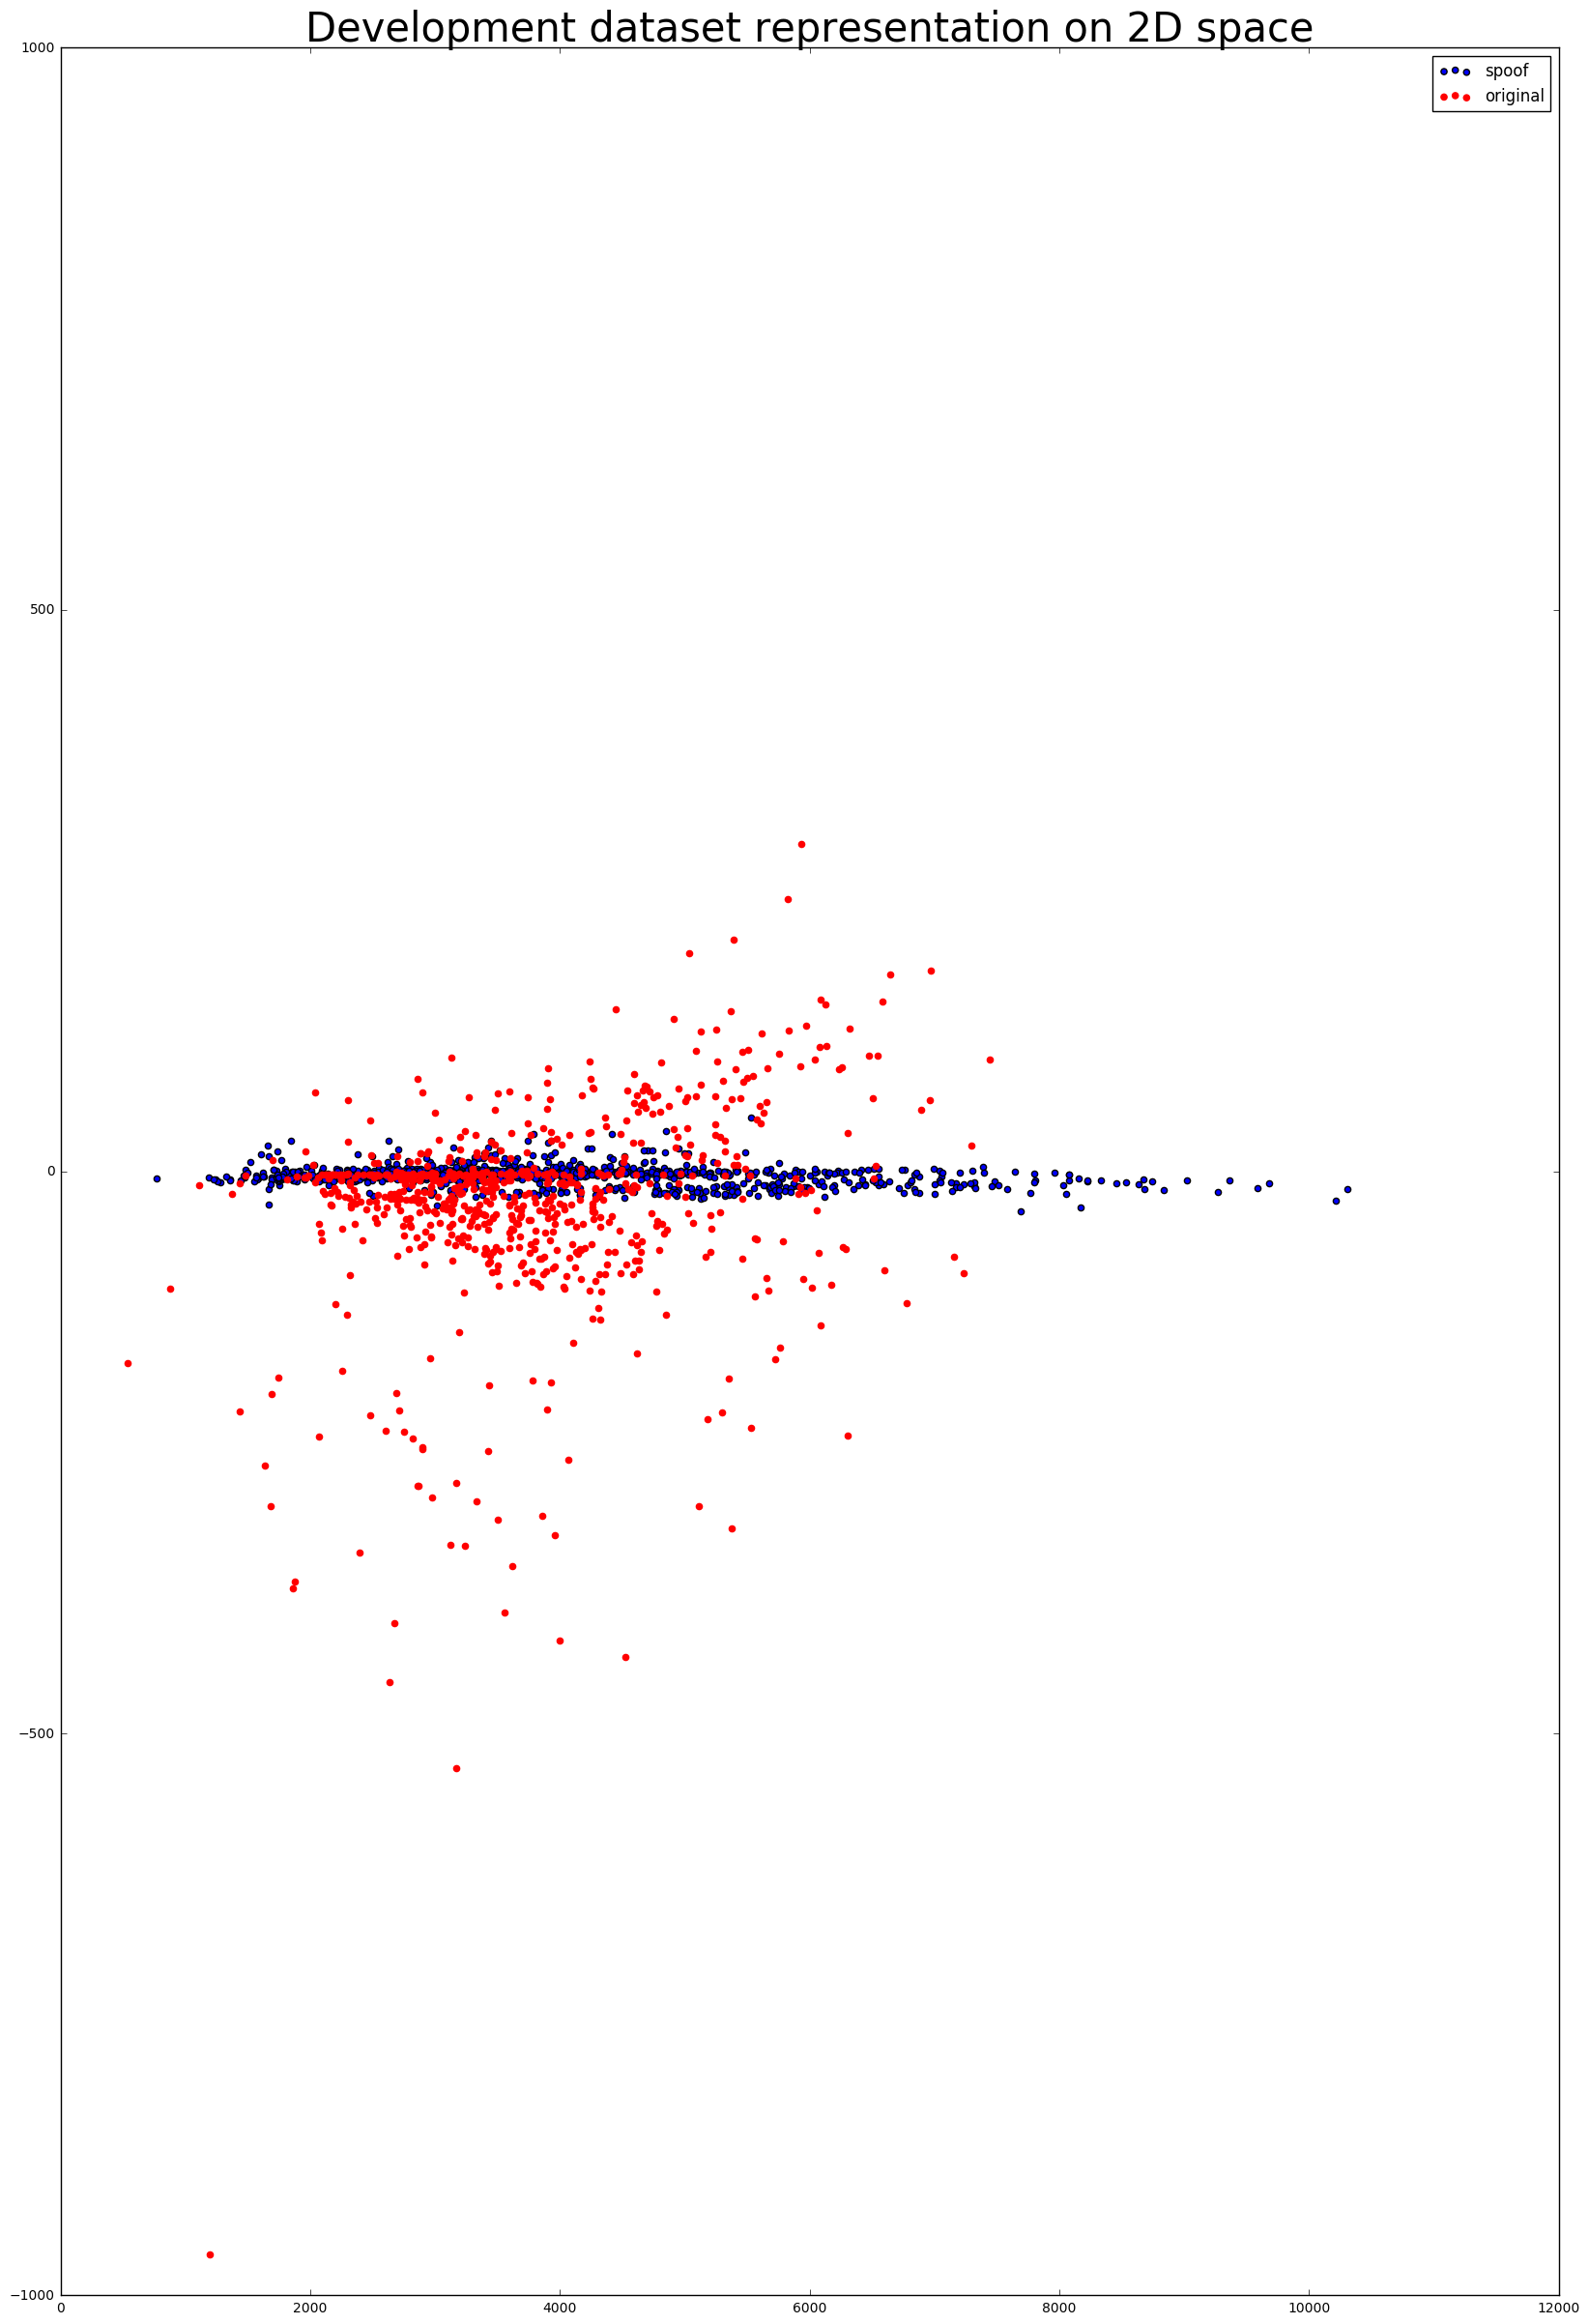

In [70]:
plt.figure(figsize=(20,30))
plt.title('Development dataset representation on 2D space', size = 30)
plt.scatter(sigmaVectorSpoofD, meanSpoofD,  label="spoof")
plt.ylim(-1000, 1000)
plt.scatter(sigmaVectorOriginalD,meanOriginalD, color = 'red', label="original")
plt.legend()
plt.show()

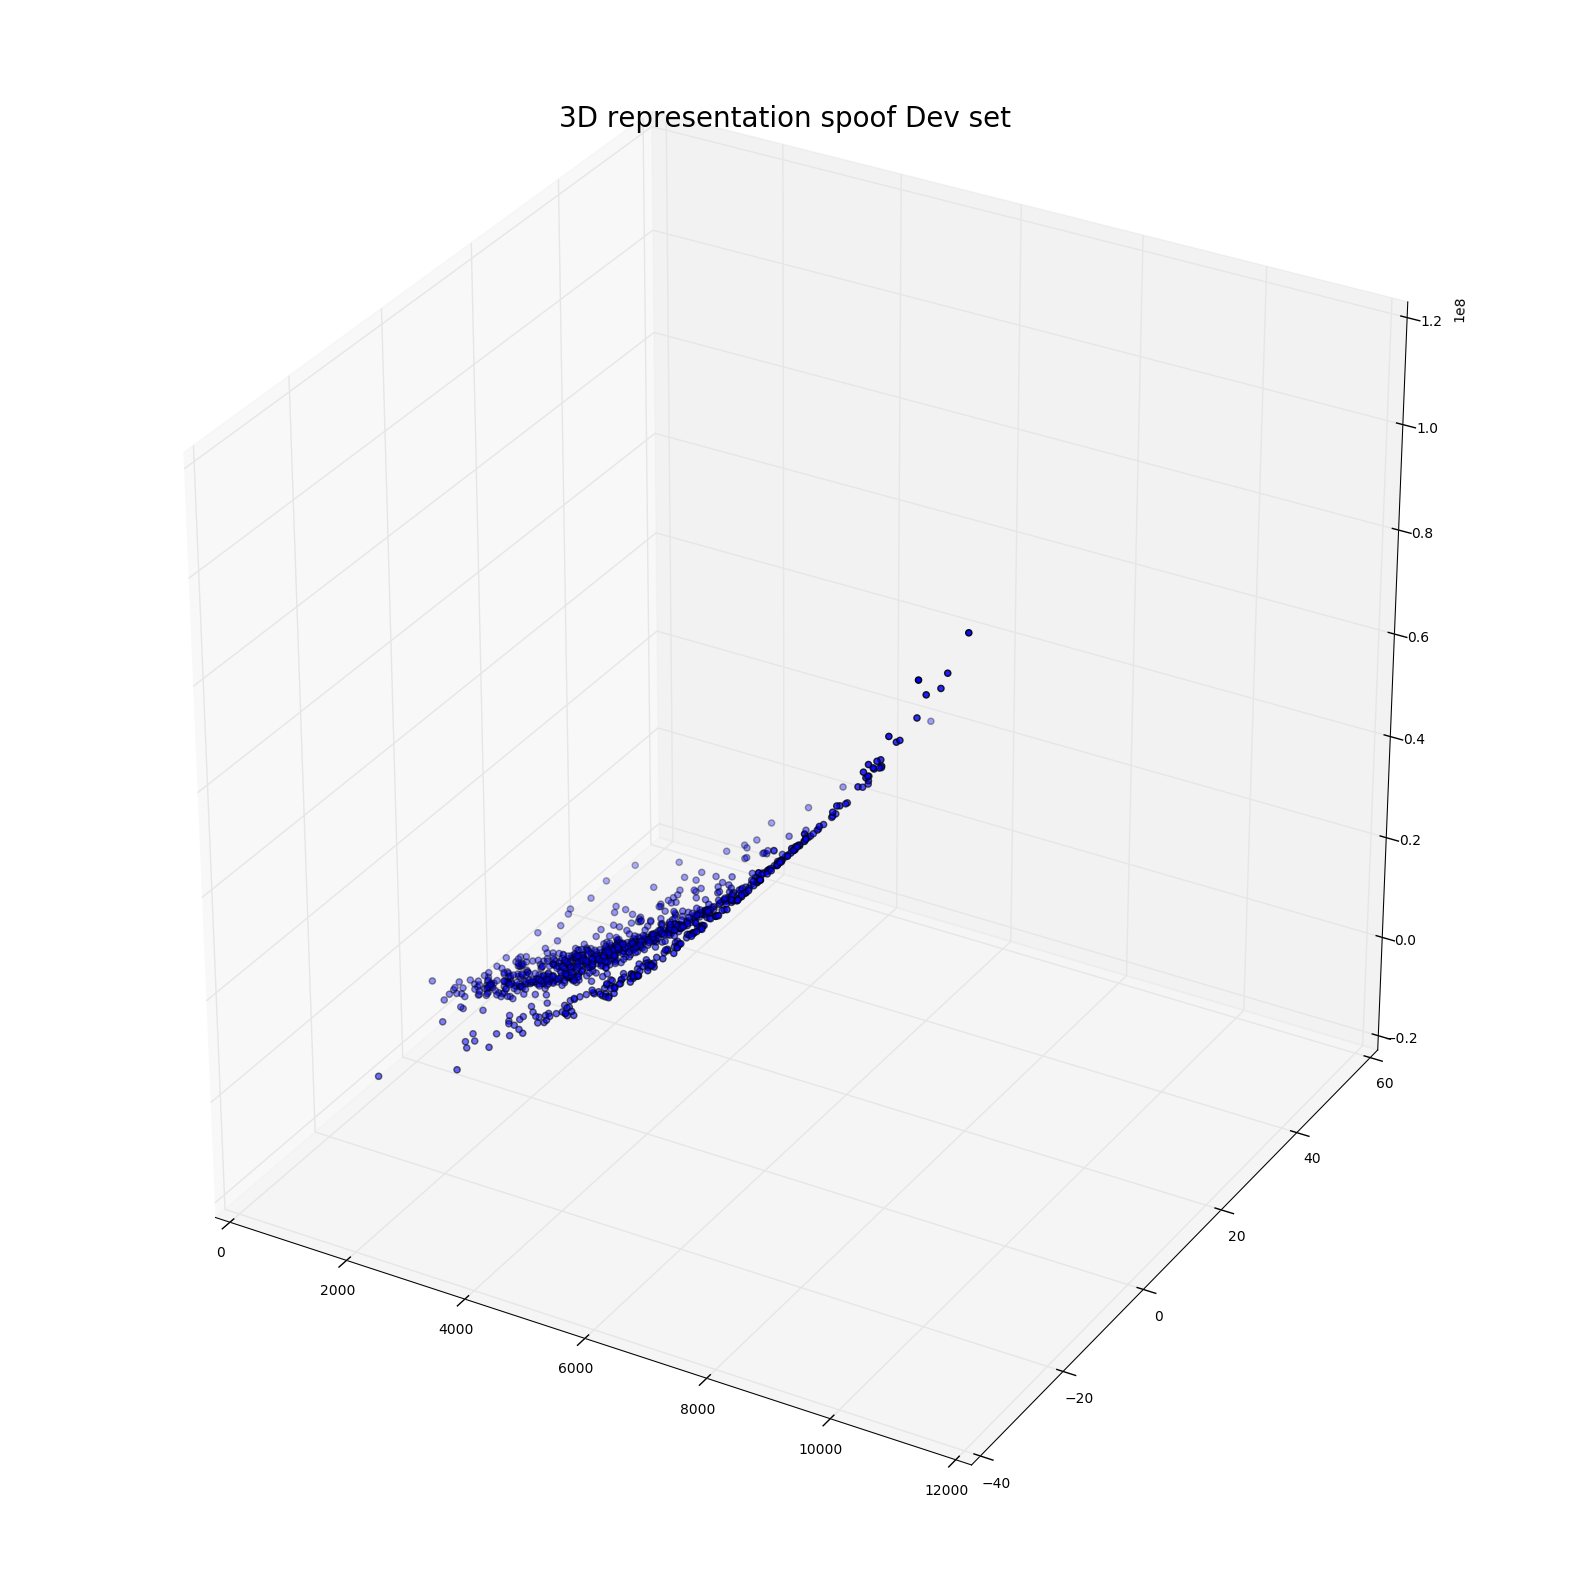

In [72]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
plt.title('3D representation spoof Dev set', size = 20)
ax.scatter(sigmaVectorSpoofD, meanSpoofD,  varSpoofD,  marker ='o')
plt.show()

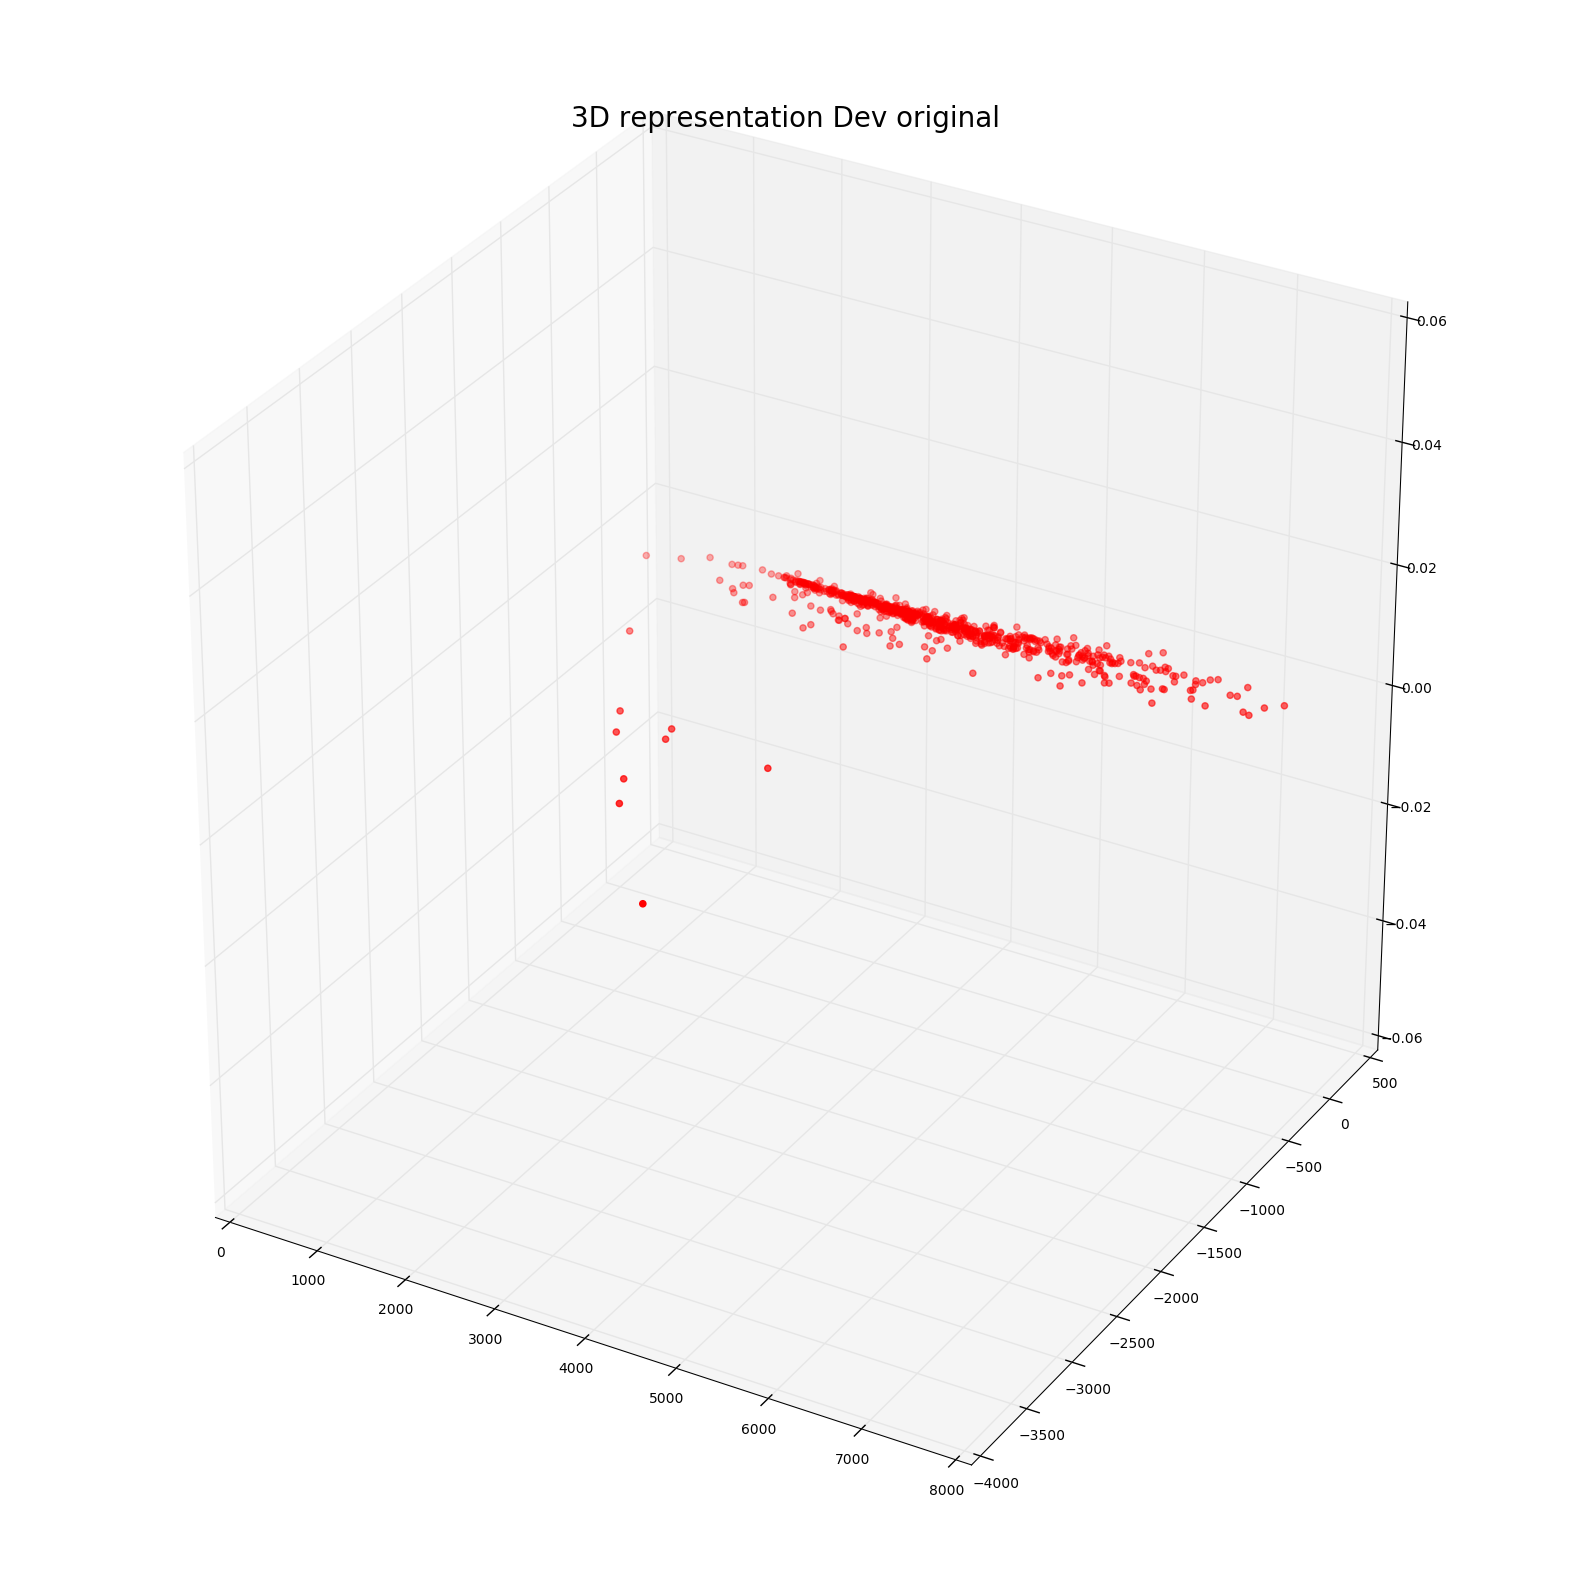

In [73]:
fig = plt.figure(figsize=(20,20))
bx = fig.add_subplot(111, projection='3d')
plt.title('3D representation Dev original', size = 20)
bx.scatter(sigmaVectorOriginalD,meanOriginalD, color = 'red', label="original")
plt.show()

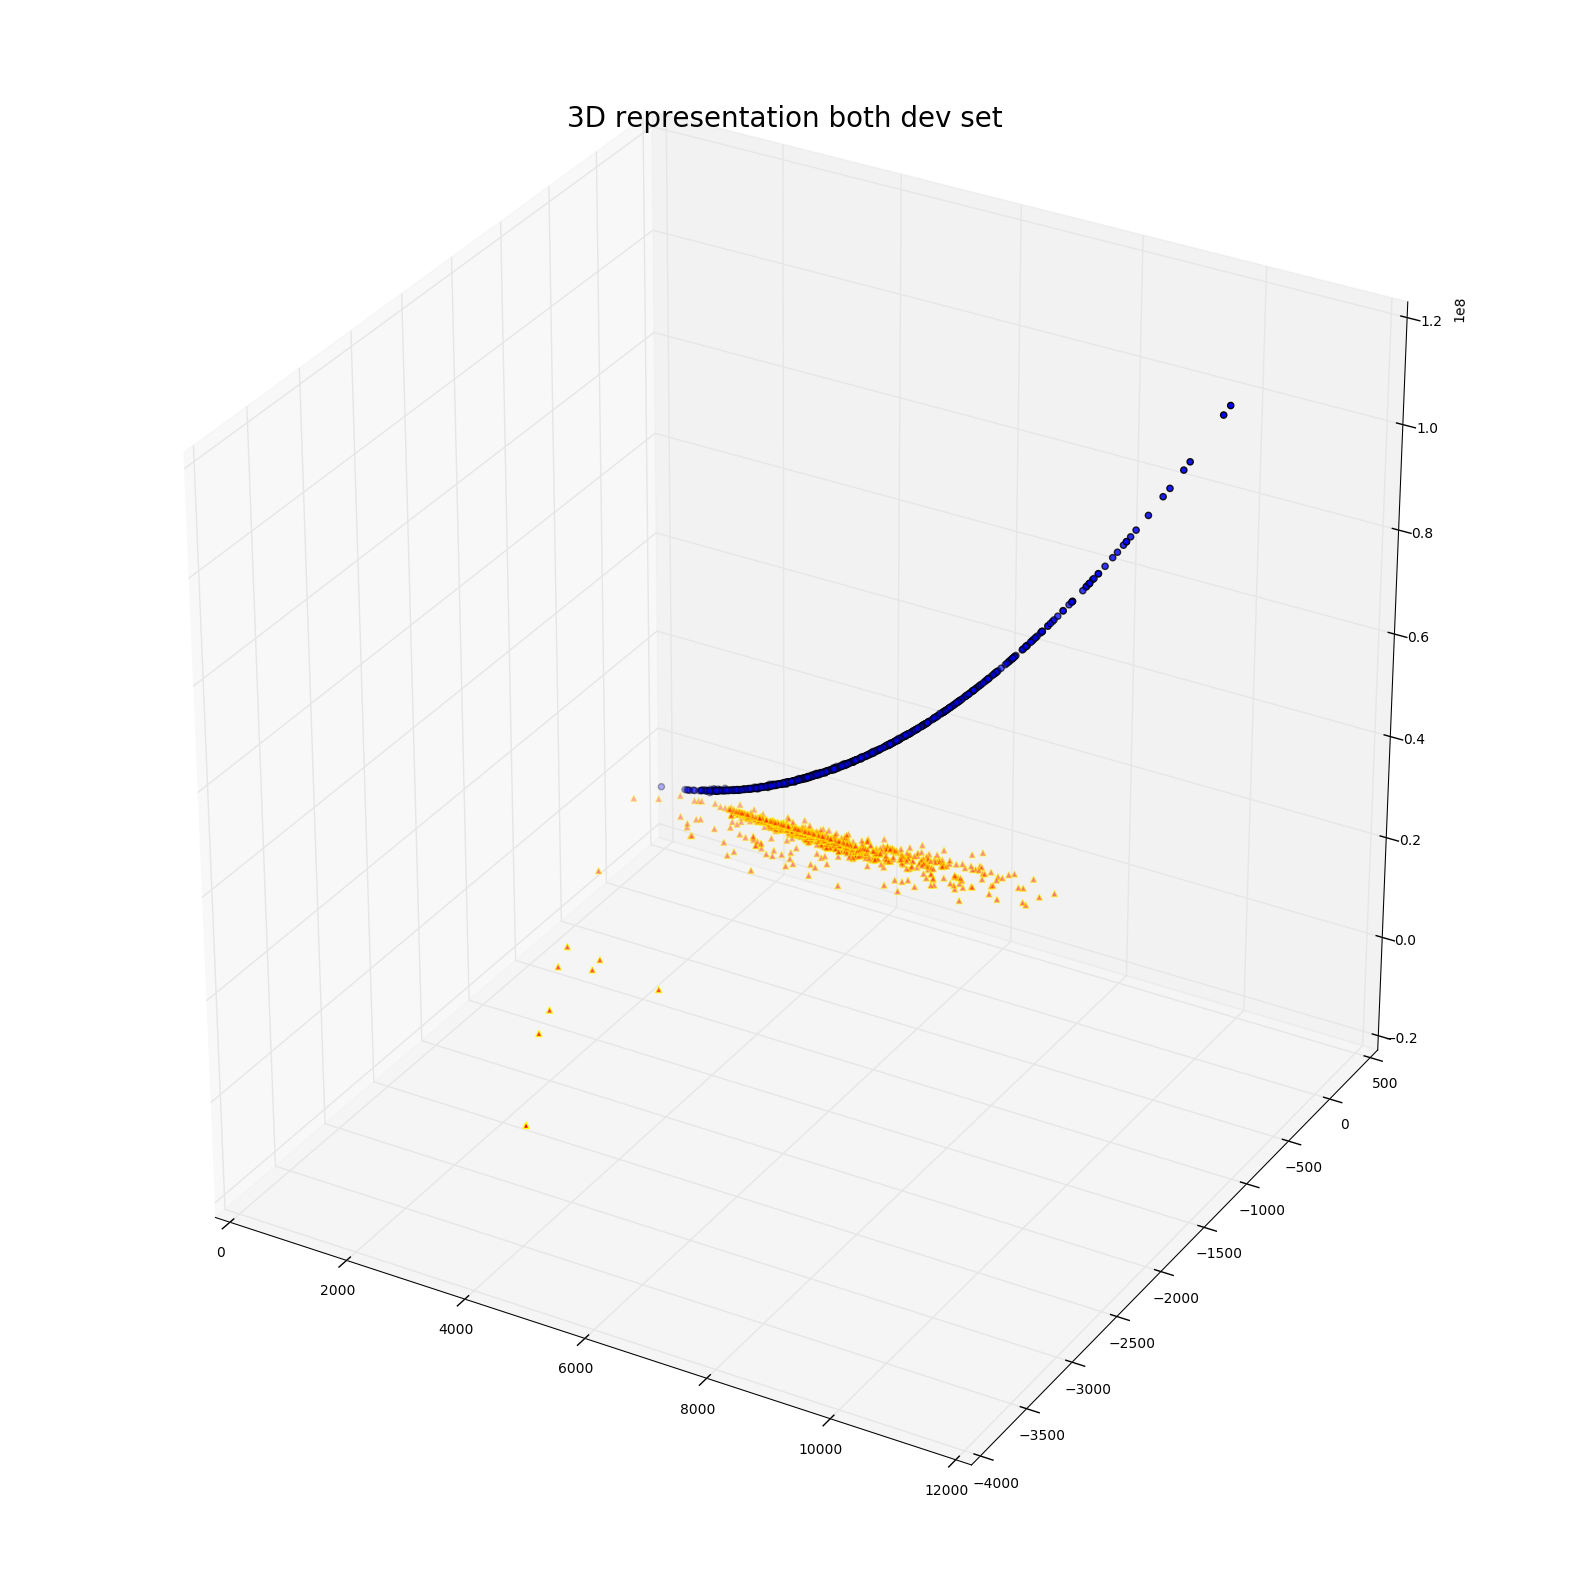

In [76]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
plt.title('3D representation both dev set', size = 20)
ax.scatter(sigmaVectorOriginalD,meanOriginalD, color = 'red',edgecolor = 'yellow', marker ='^')
ax.scatter(sigmaVectorSpoofD, meanSpoofD,  varSpoofD,  marker ='o')
plt.show()

# Werth images development set

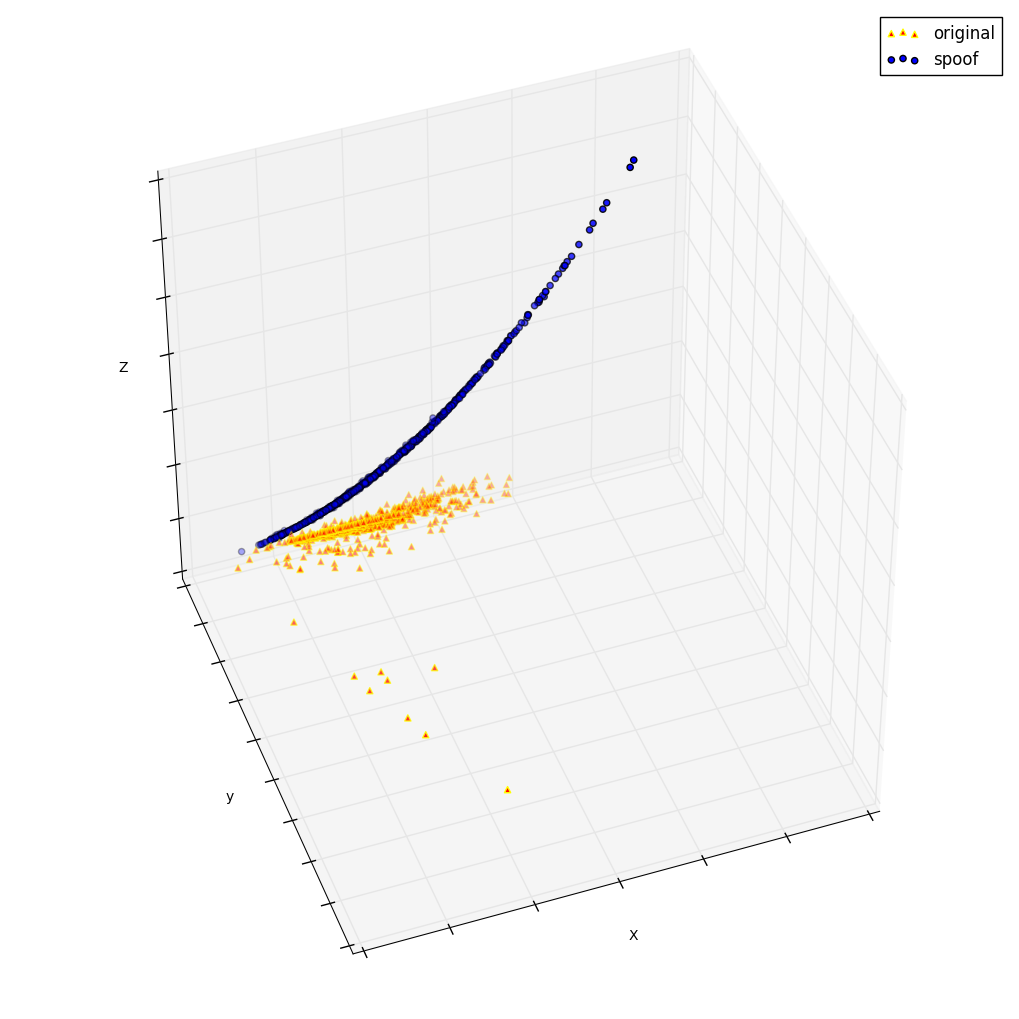

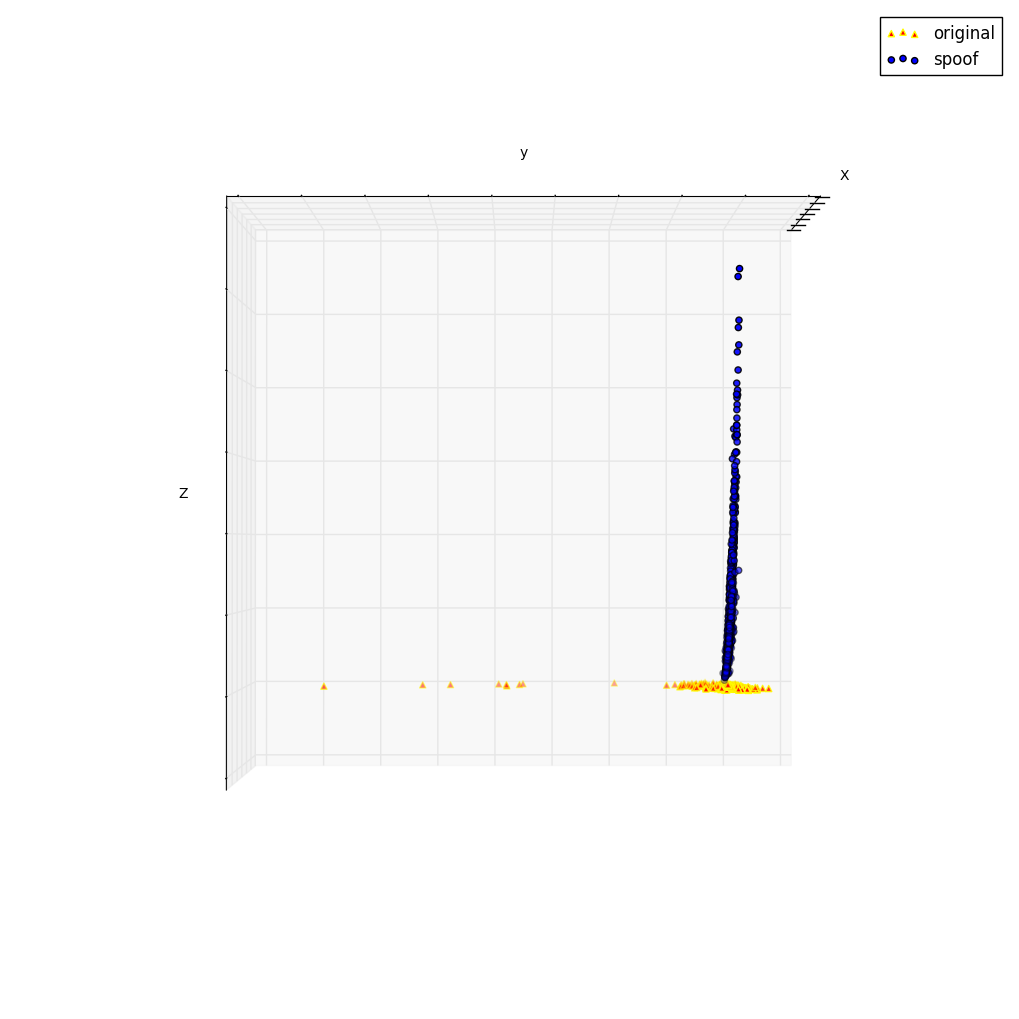

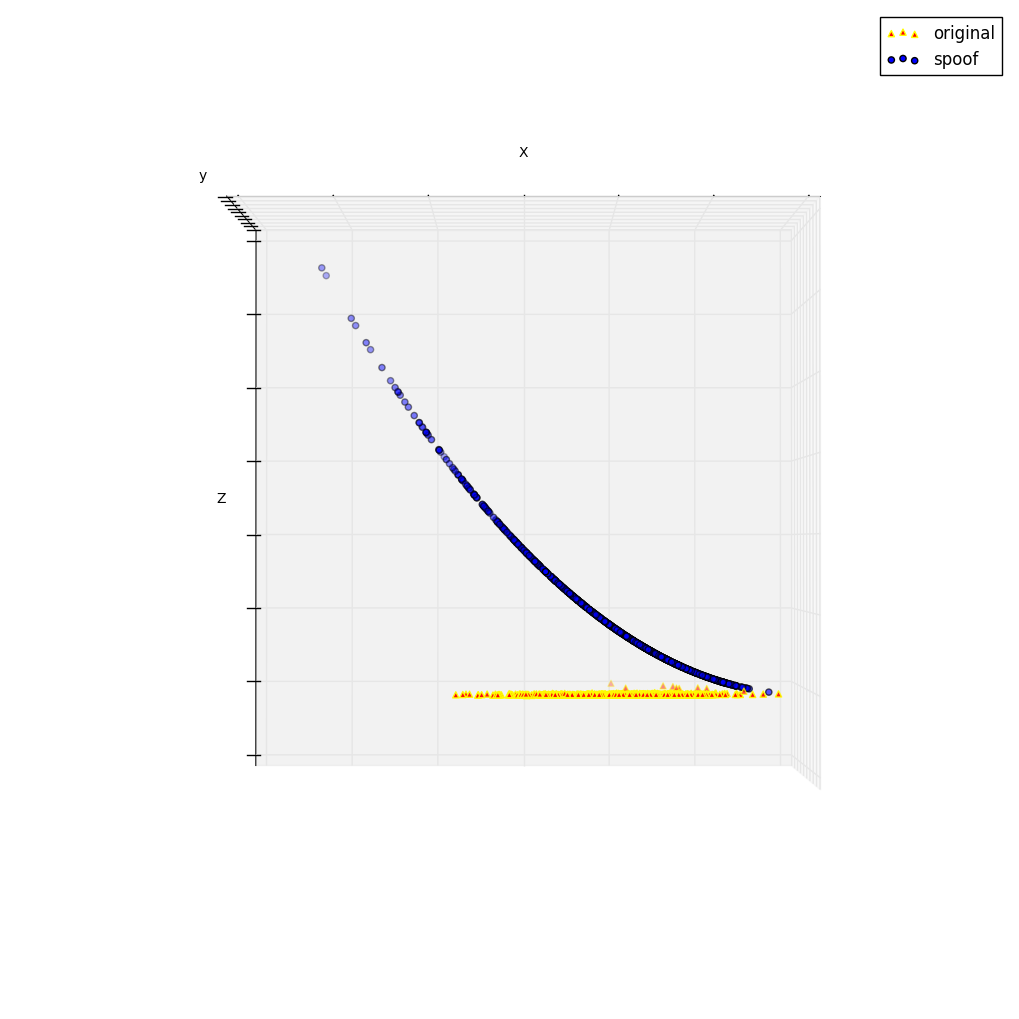

In [154]:
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(10, 10))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(sigmaVectorOriginalD,meanOriginalD, color = 'red',edgecolor = 'yellow', marker ='^', label = 'original')
    ax.scatter(sigmaVectorSpoofD, meanSpoofD,  varSpoofD,  marker ='o', label = 'spoof')
    
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_zlabel('Z')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.legend()

elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)

plt.show()

# Make sets of data

In [90]:
X_train_original = np.vstack([sigmaVectorOriginal, meanOriginal,  varOriginal]).T
X_train_spoof = np.vstack([sigmaVectorSpoof, meanSpoof,  varSpoof]).T

X_test_original = np.vstack([sigmaVectorOriginalD, meanOriginalD,  varOriginalD]).T
X_test_spoof = np.vstack([sigmaVectorSpoofD, meanSpoofD,  varSpoofD]).T


In [93]:
X_train = np.vstack([X_train_original, X_train_spoof])
X_test = np.vstack([X_test_original, X_test_spoof])

In [100]:
y_train = np.concatenate([np.zeros(X_train_original.shape[0]), np.ones(X_train_spoof.shape[0])])
y_test = np.concatenate([np.zeros(X_test_original.shape[0]), np.ones(X_test_spoof.shape[0])])

# Uploading data

In [158]:
np.savetxt('X_train_original.txt', X_train_original)
np.savetxt('X_train_spoof.txt', X_train_spoof)
np.savetxt('X_test_original.txt', X_test_original)
np.savetxt('X_test_spoof.txt', X_test_spoof)

In [159]:
print X_train_original.shape, X_train_spoof.shape

(1508L, 3L) (1508L, 3L)


# Perceptron

In [107]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

In [164]:
clf = Perceptron ( random_state=241)
clf.fit (X_train, y_train )
predictions = clf.predict(X_test)
score = accuracy_score(y_test,predictions)
print score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = Perceptron(random_state=241)
clf.fit(X_train_scaled, y_train)
prediciton = clf.predict(X_test_scaled)

score_scaled= accuracy_score(prediciton, y_test)

print score_scaled

0.555555555556
0.689473684211


# Linear Regression Classifier

(Also read http://scikit-learn.org/stable/modules/linear_model.html)


In [179]:
from sklearn import datasets, linear_model


ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

prediciton = ols.predict(X_test)


# SVM

In [180]:
from sklearn.svm import SVC
clf = SVC()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)
prediciton = clf.predict(X_test_scaled)

score_scaled= accuracy_score(prediciton, y_test)
print score_scaled

0.785380116959
